# Histograms of tilt angle, individual and aggregated

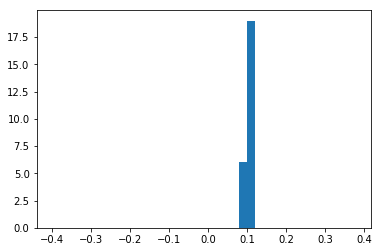

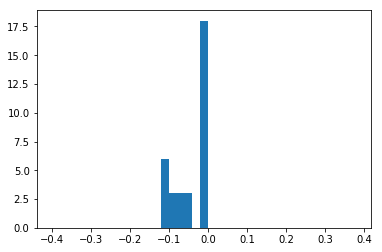

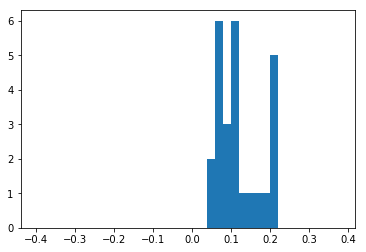

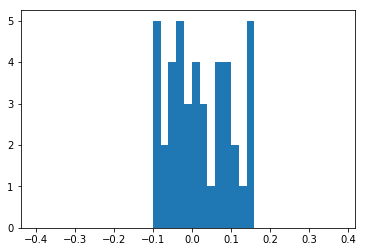

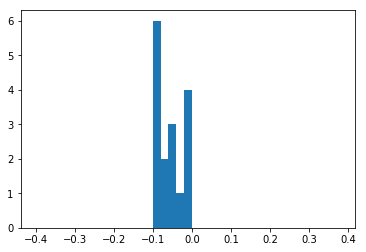

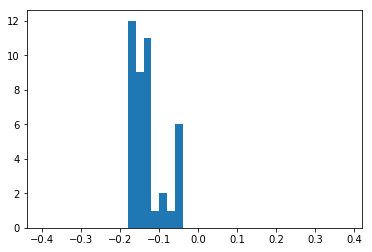

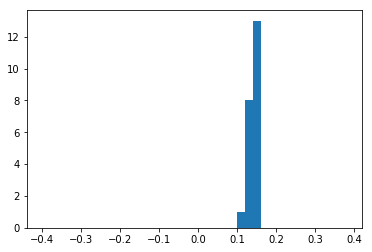

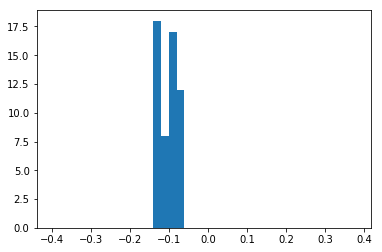

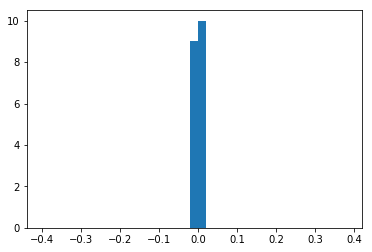

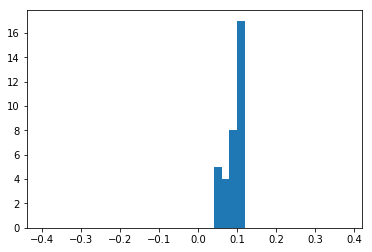

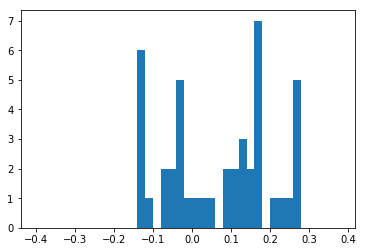

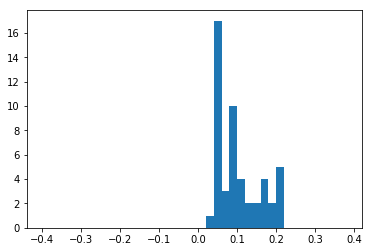

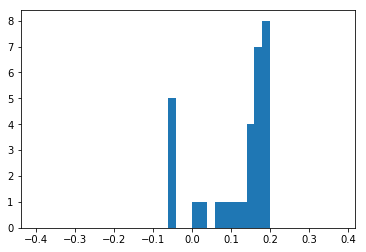

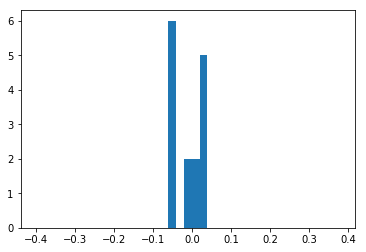

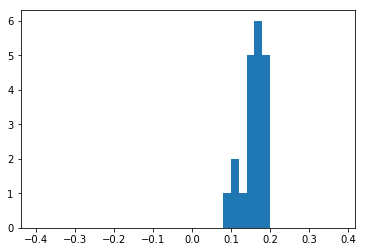

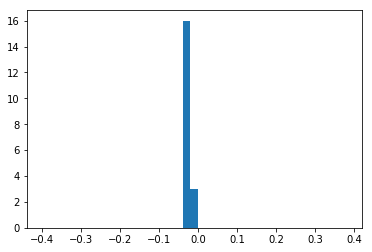

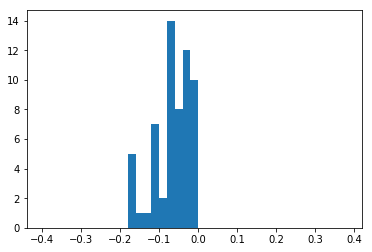

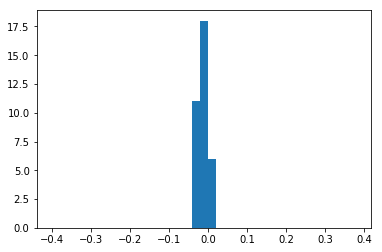

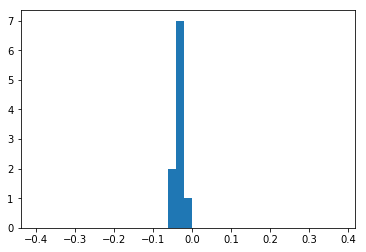

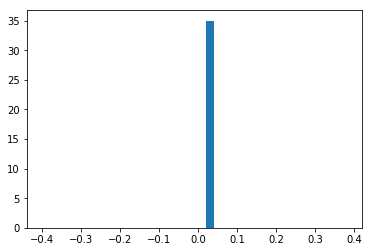

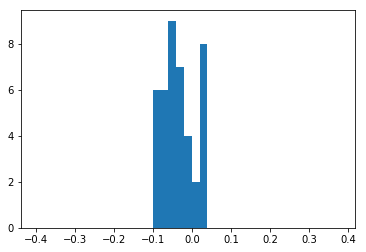

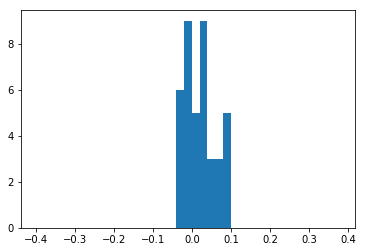

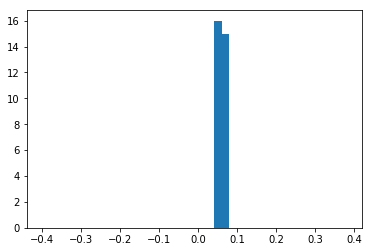

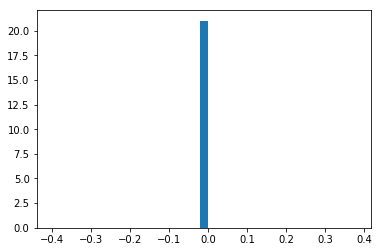

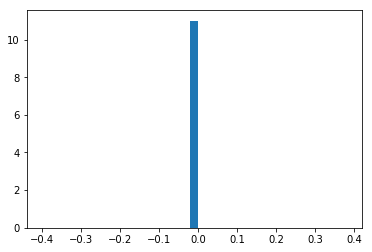

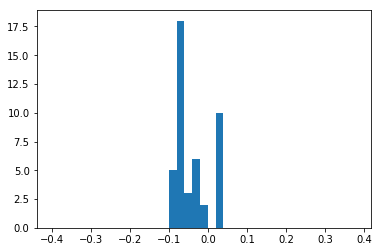

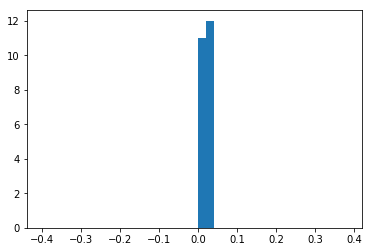

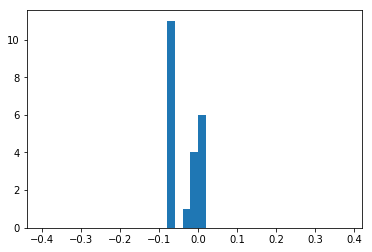

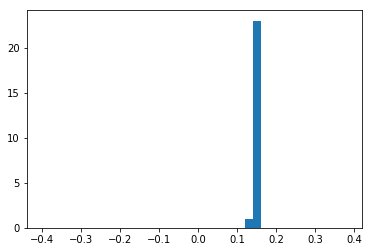

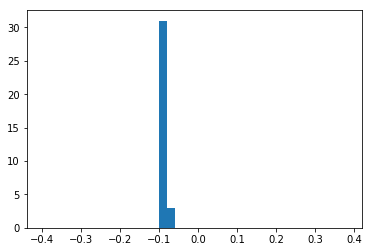

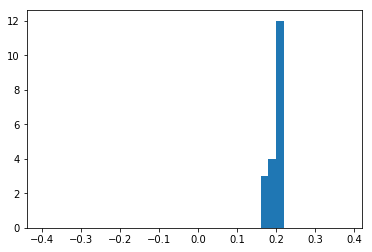

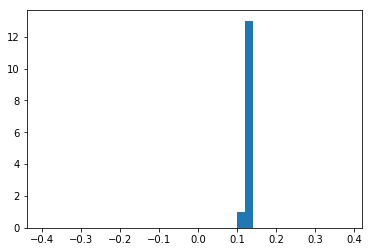

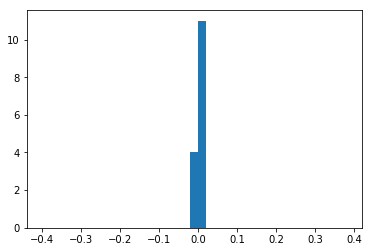

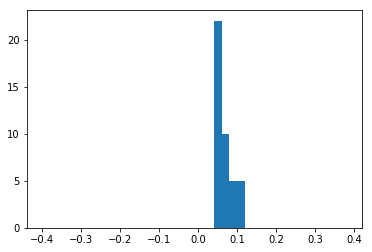

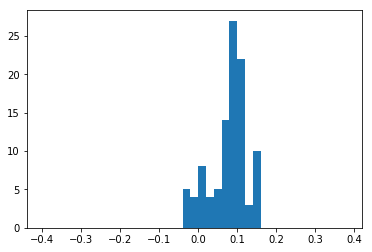

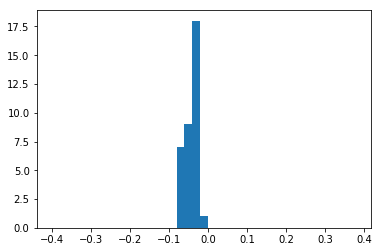

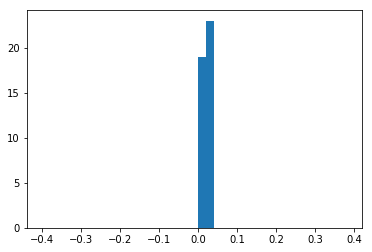

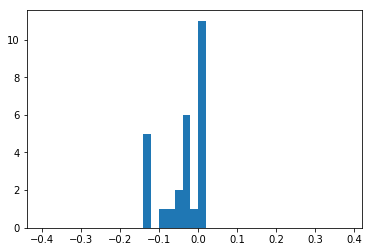

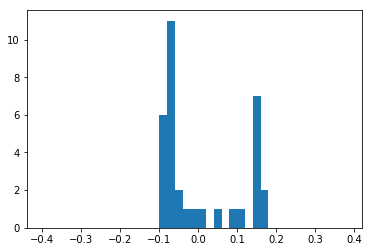

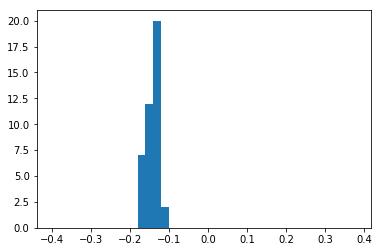

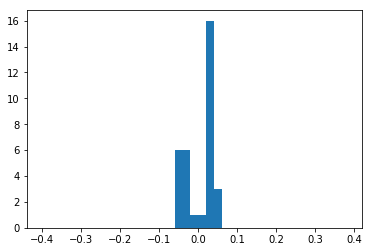

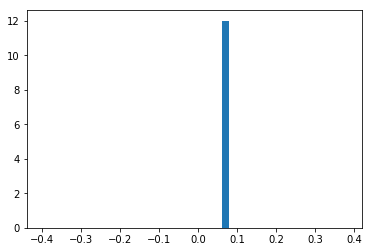

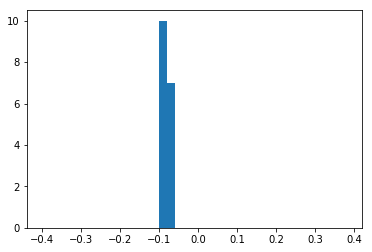

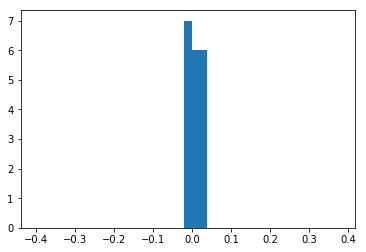

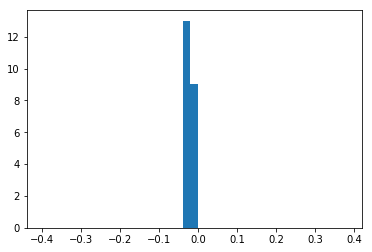

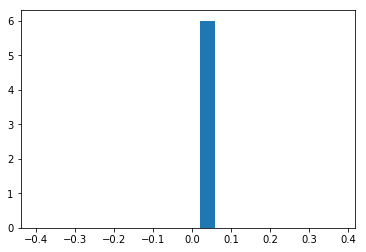

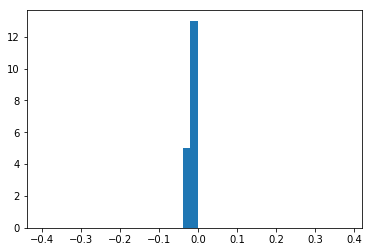

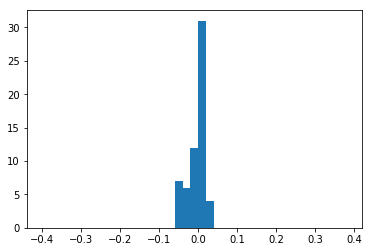

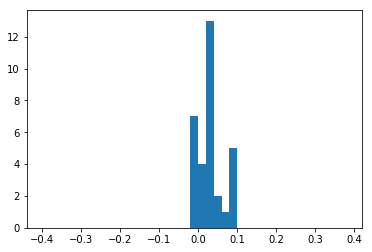

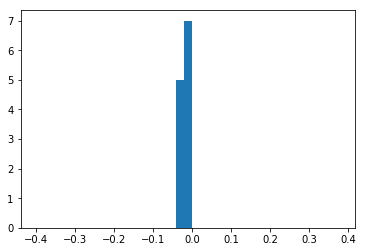

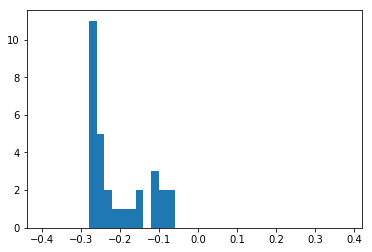

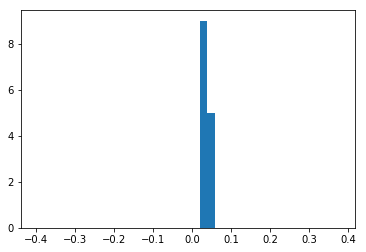

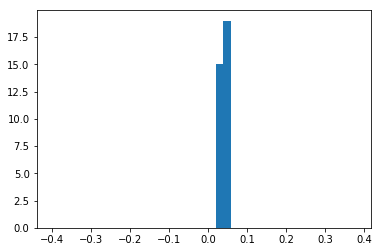

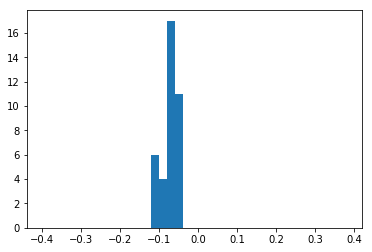

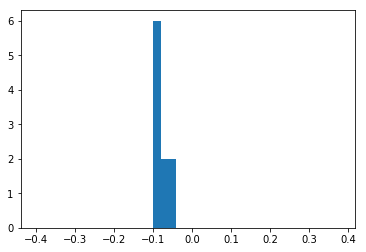

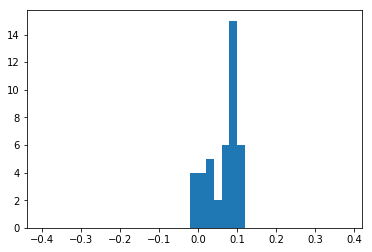

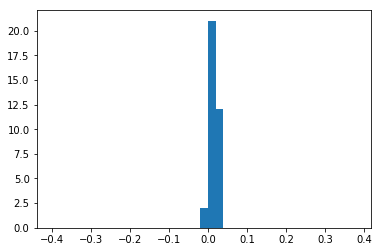

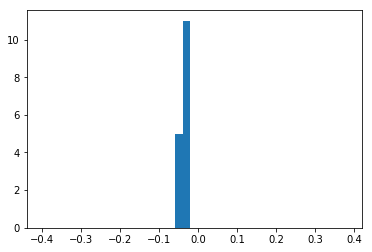

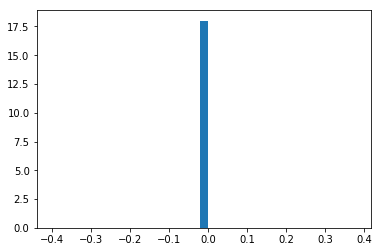

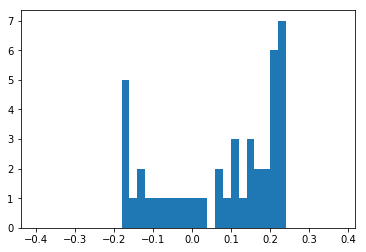

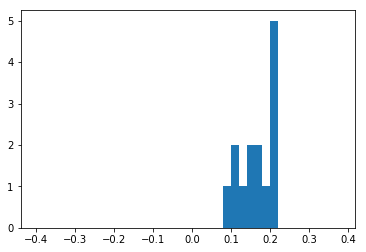

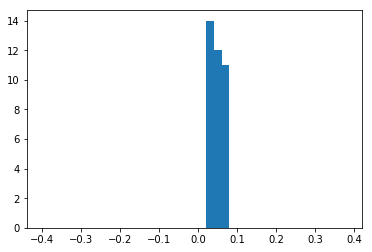

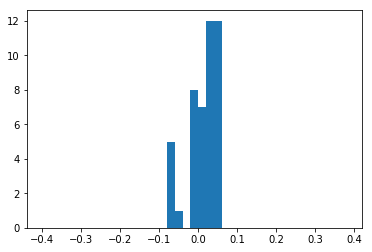

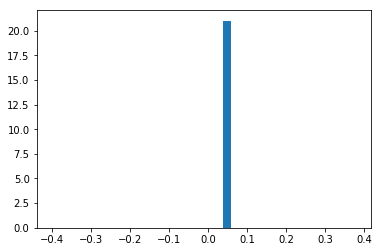

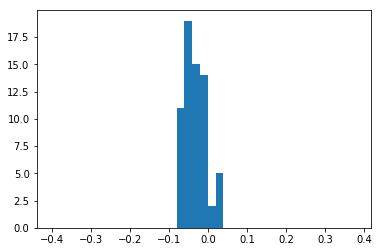

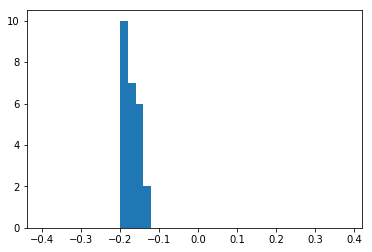

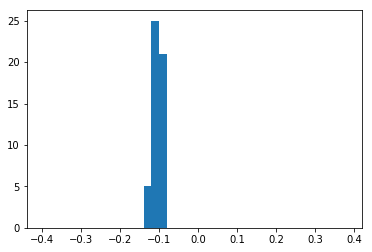

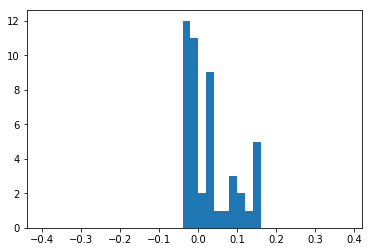

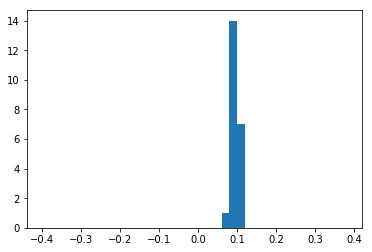

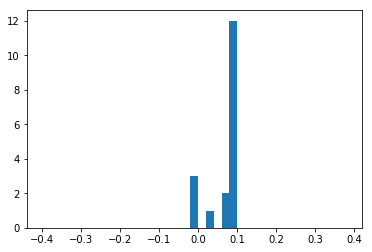

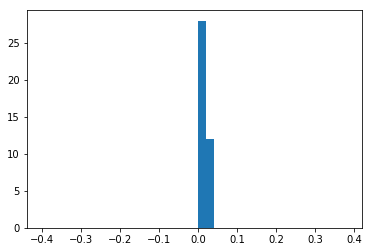

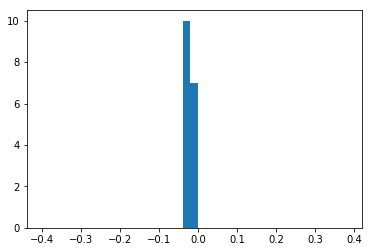

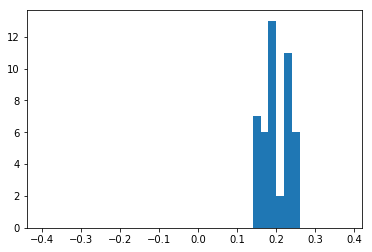

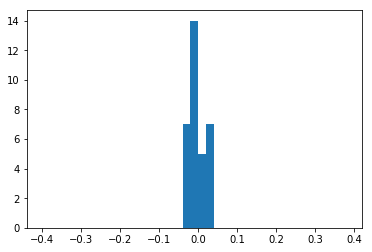

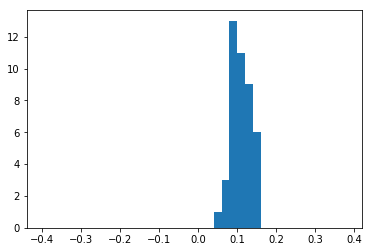

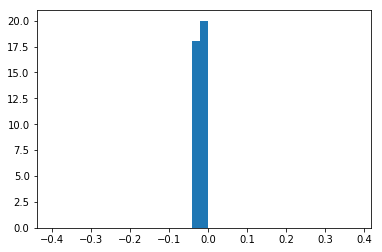

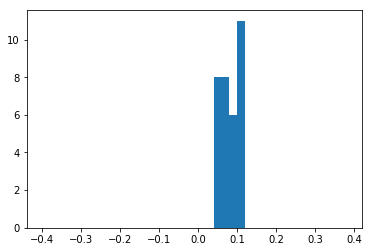

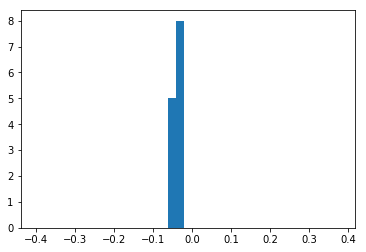

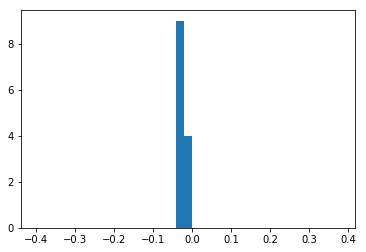

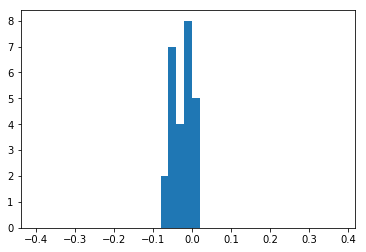

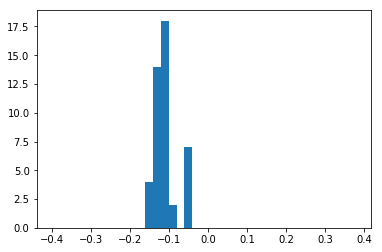

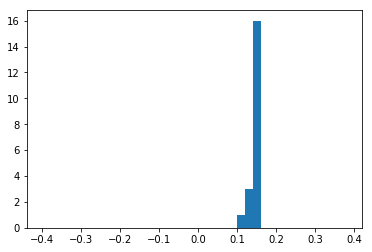

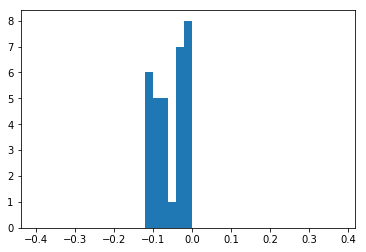

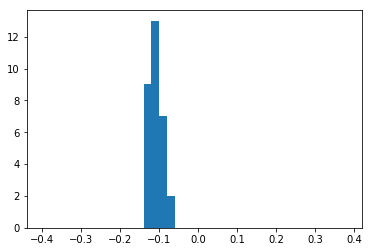

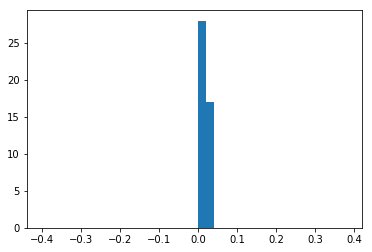

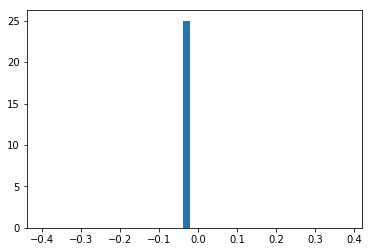

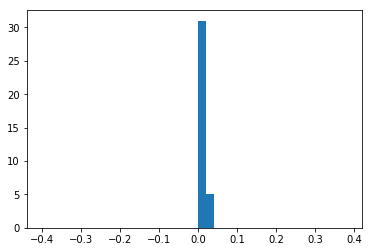

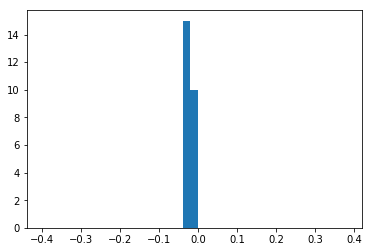

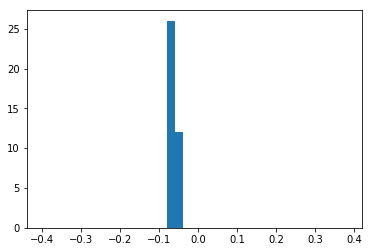

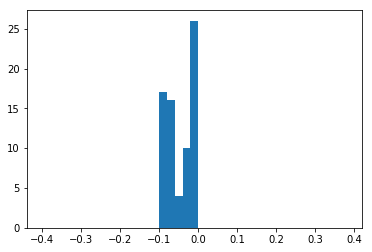

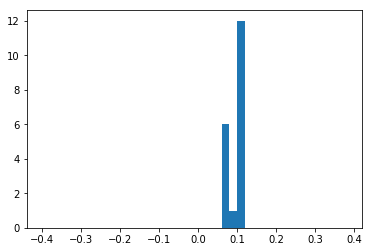

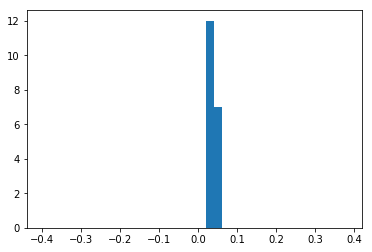

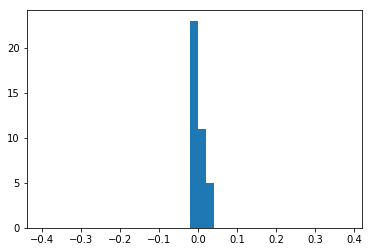

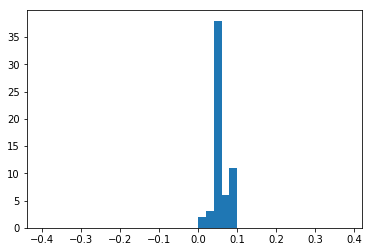

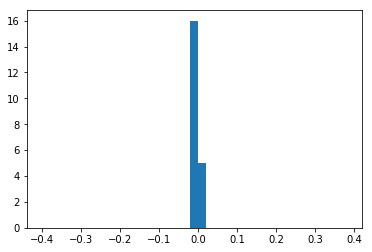

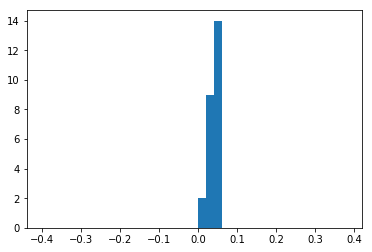

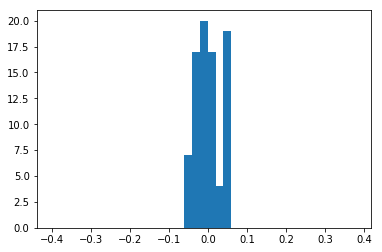

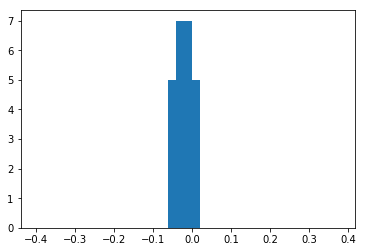

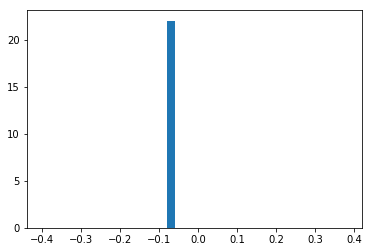

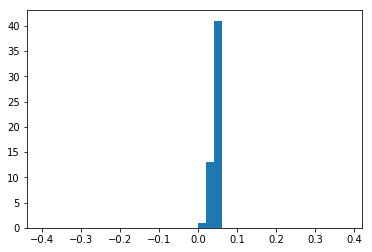

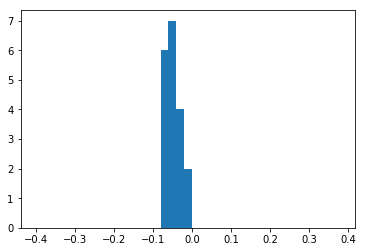

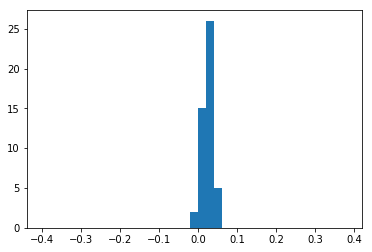

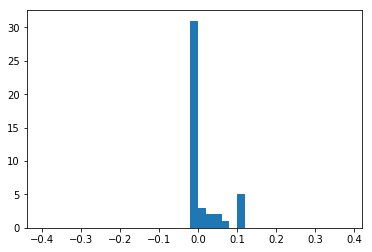

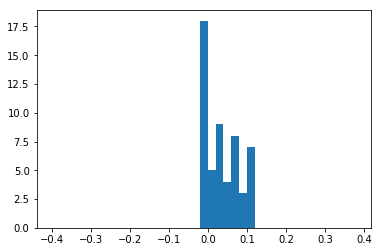

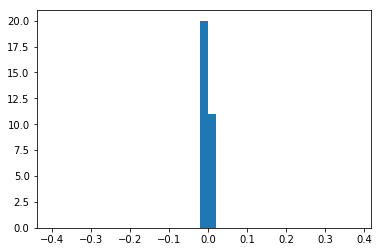

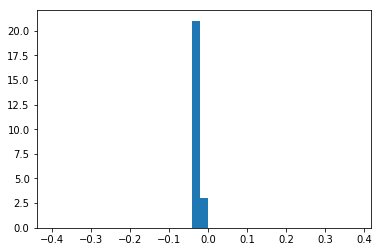

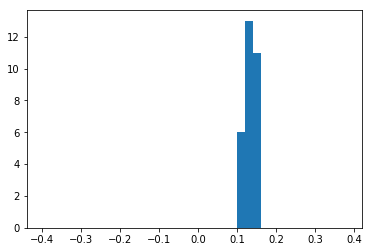

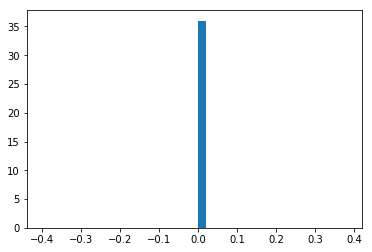

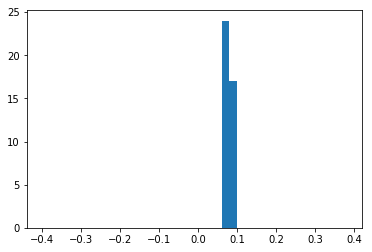

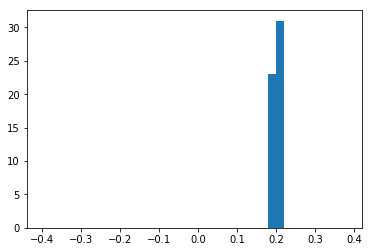

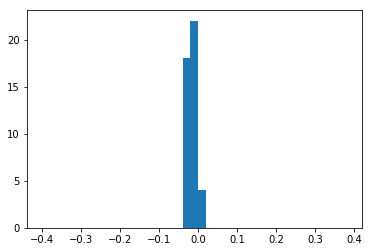

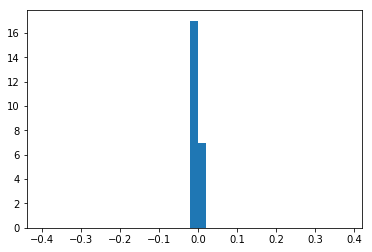

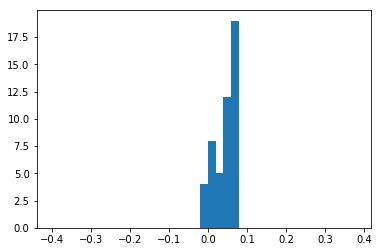

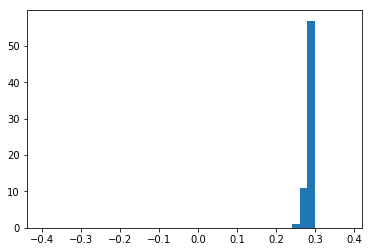

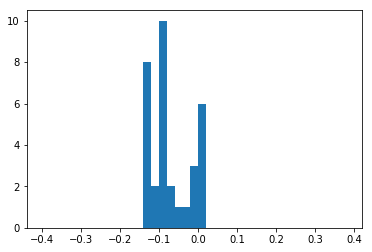

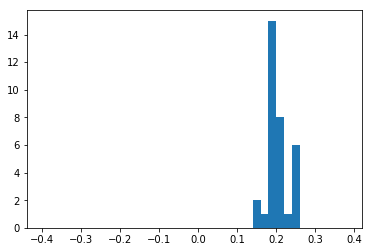

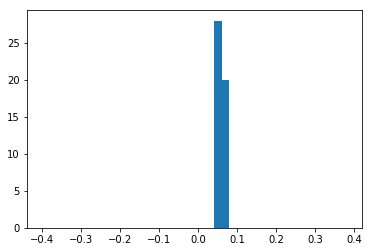

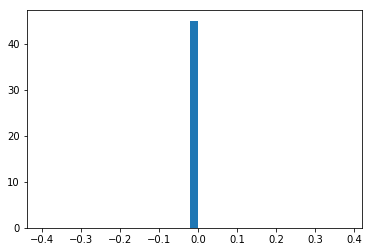

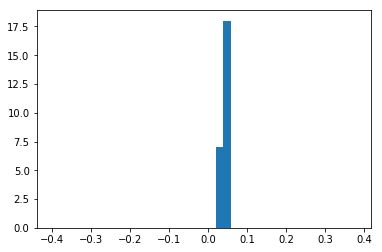

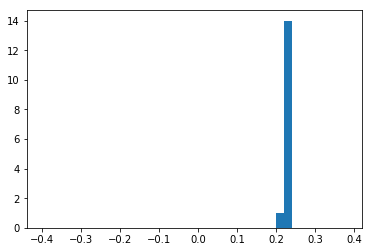

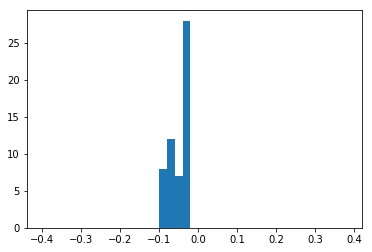

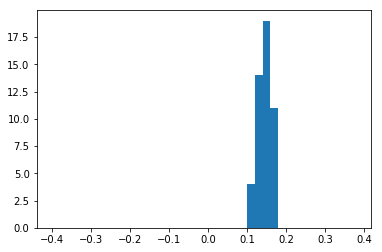

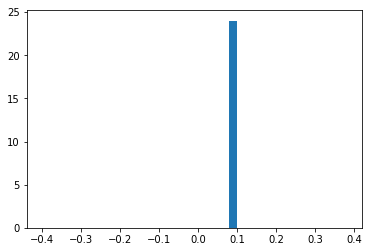

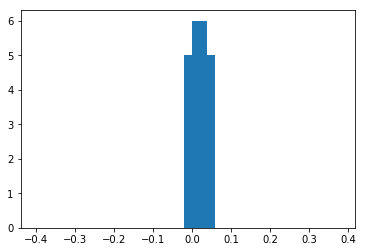

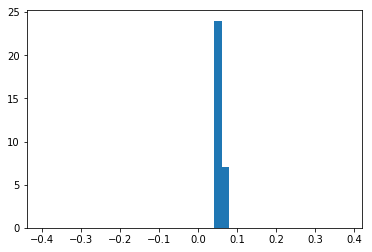

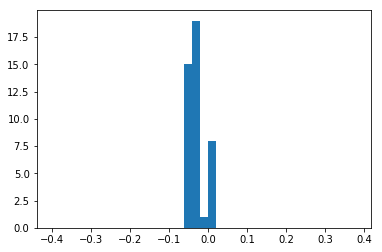

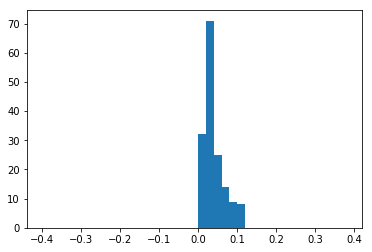

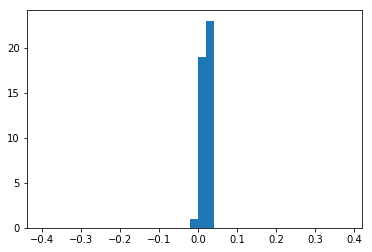

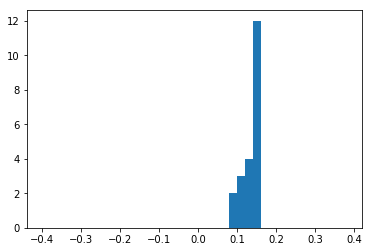

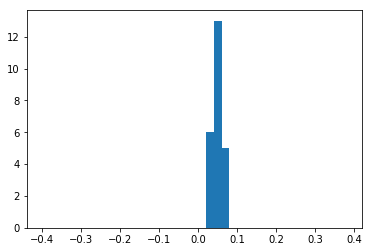

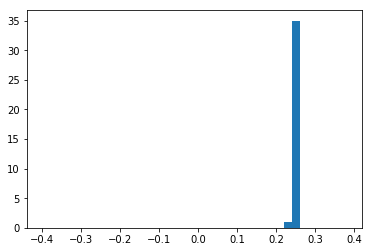

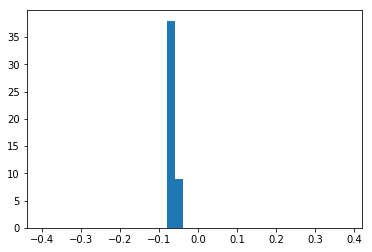

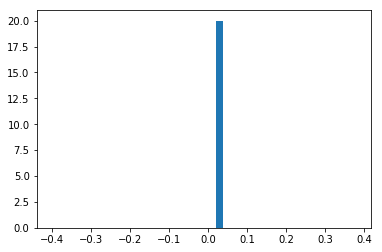

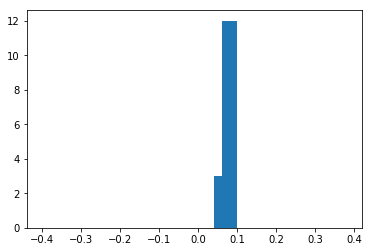

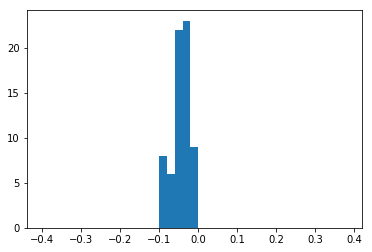

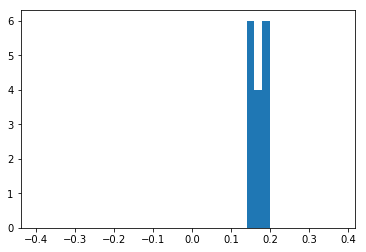

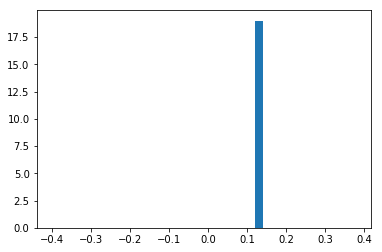

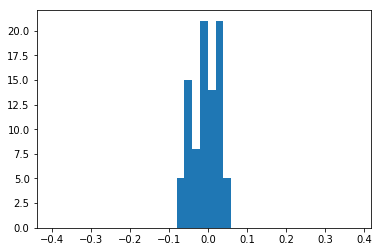

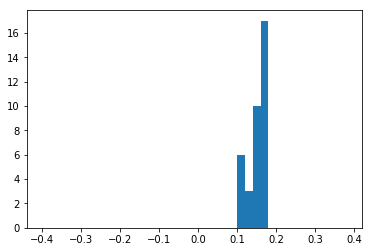

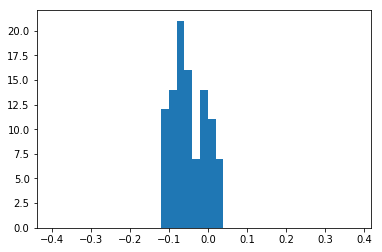

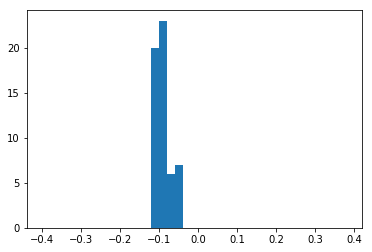

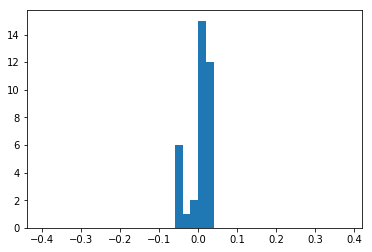

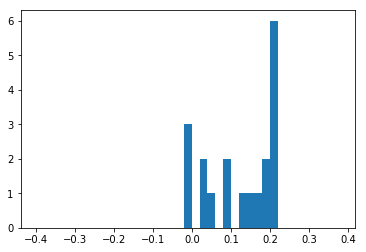

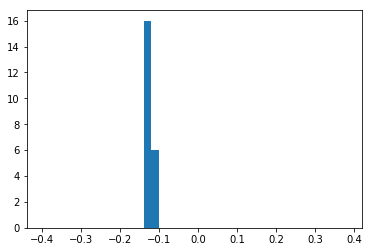

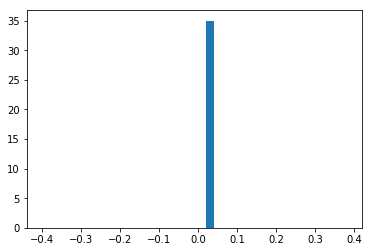

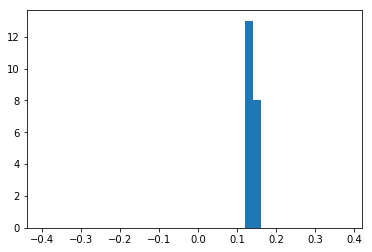

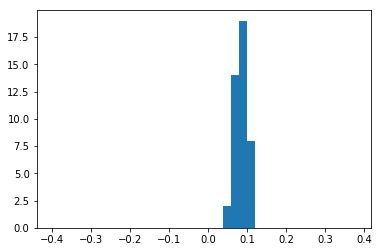

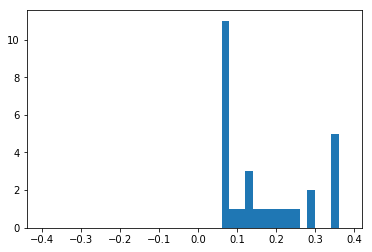

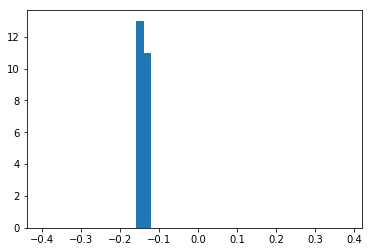

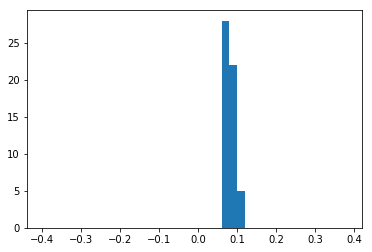

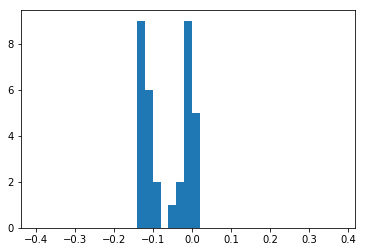

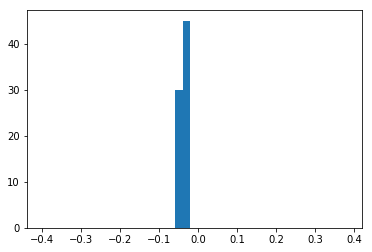

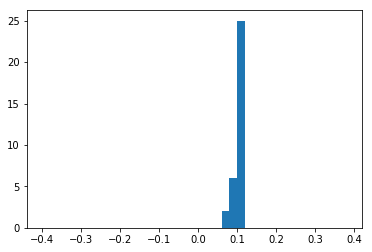

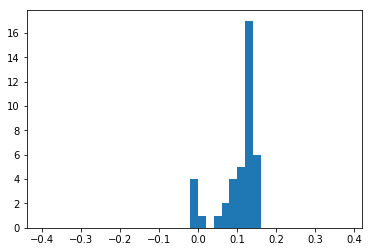

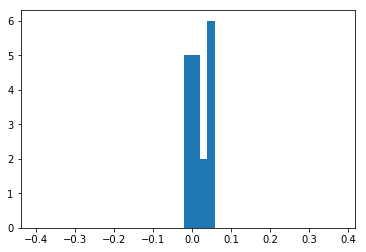

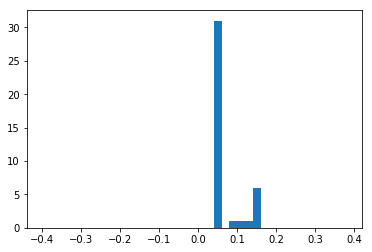

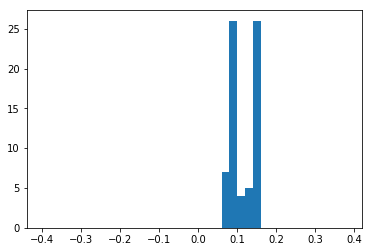

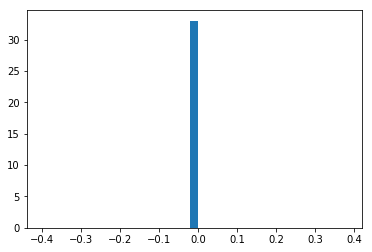

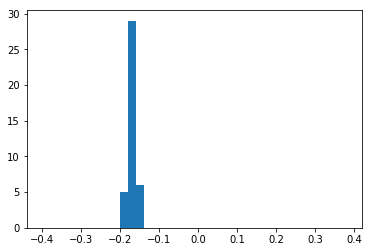

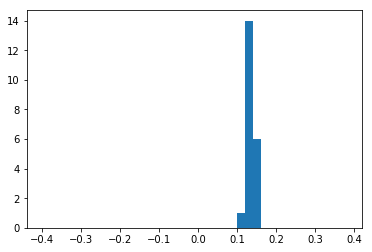

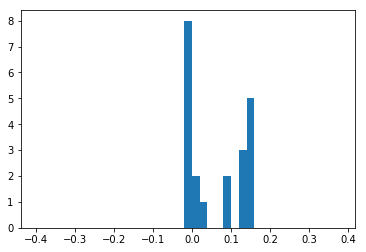

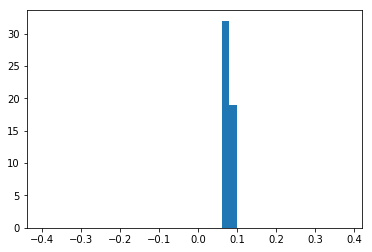

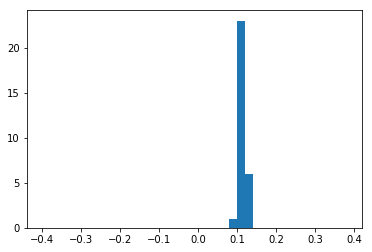

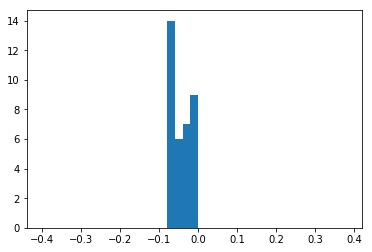

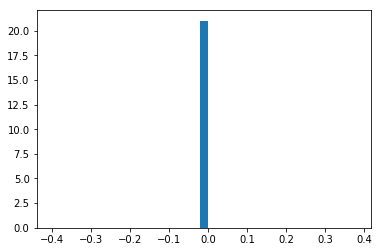

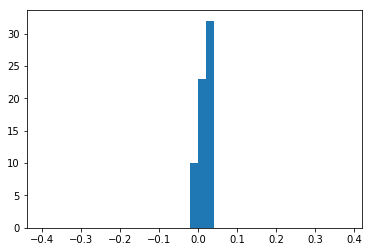

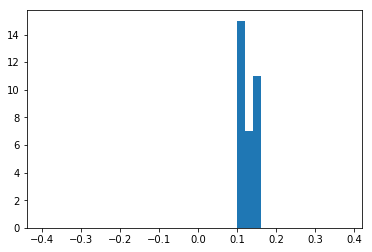

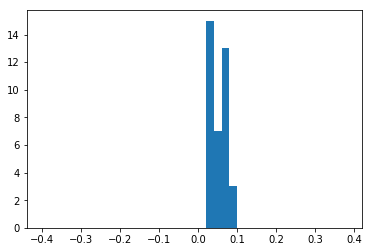

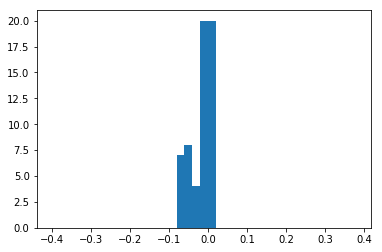

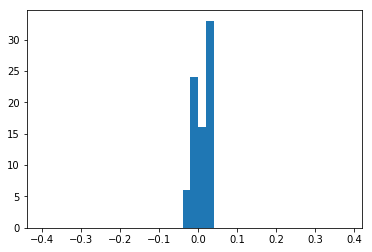

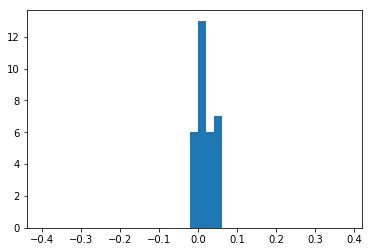

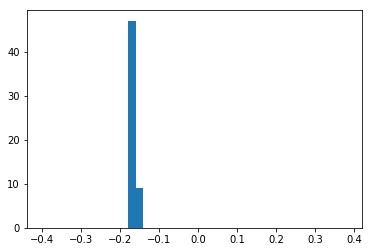

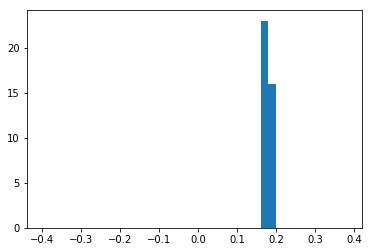

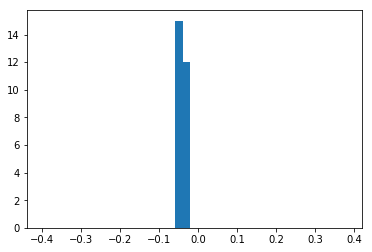

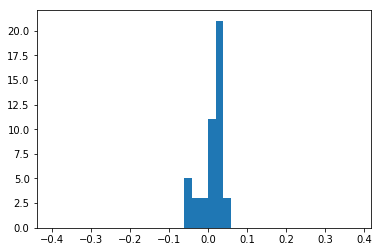

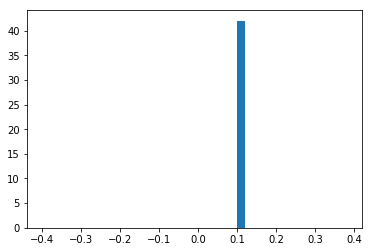

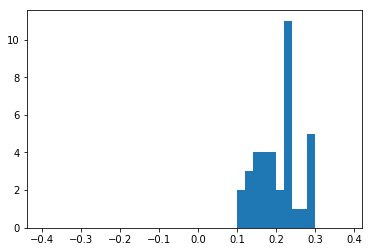

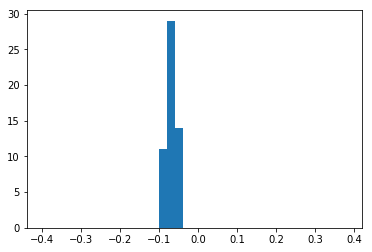

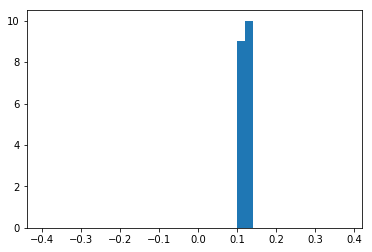

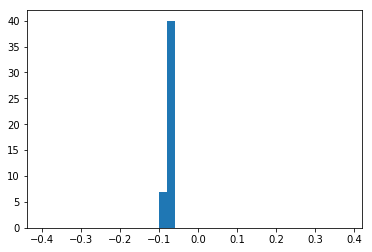

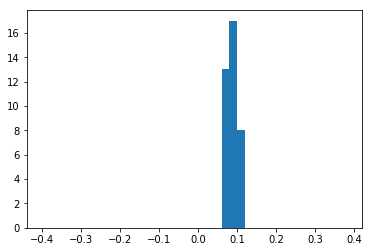

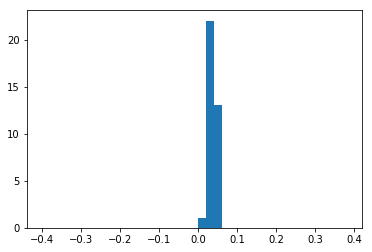

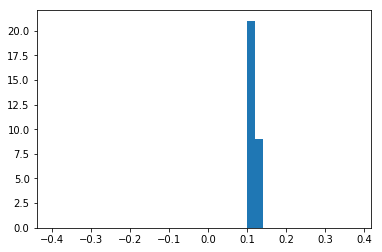

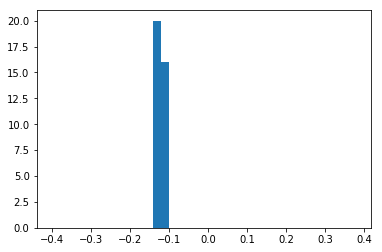

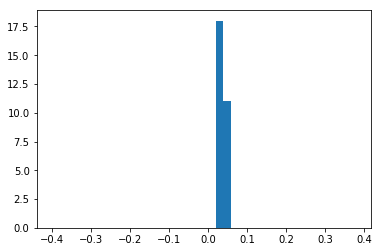

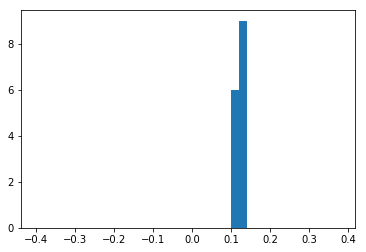

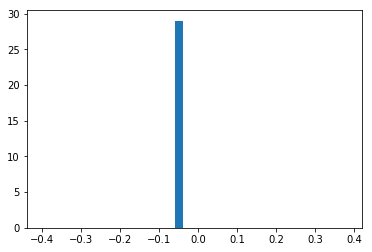

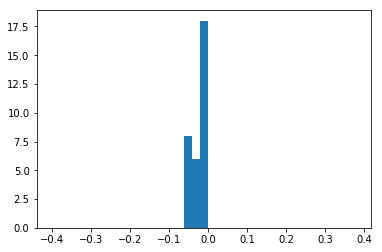

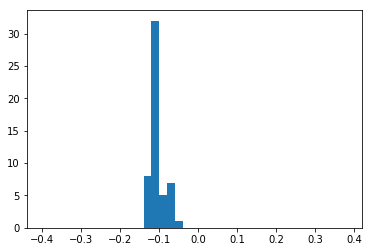

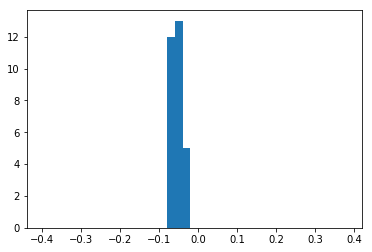

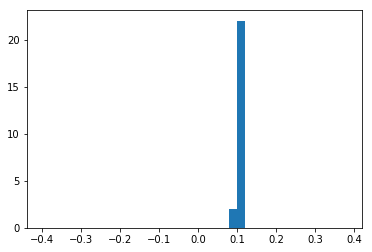

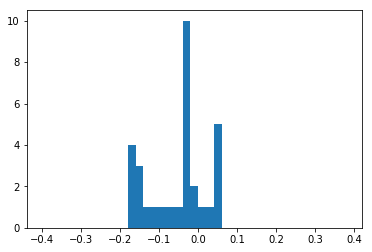

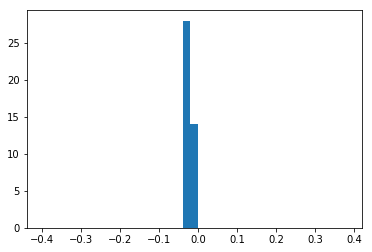

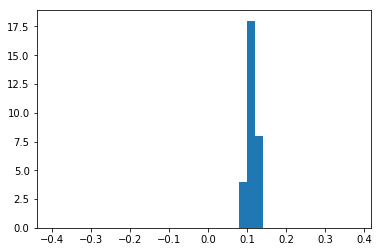

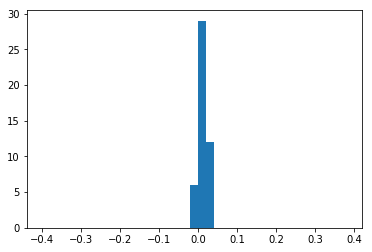

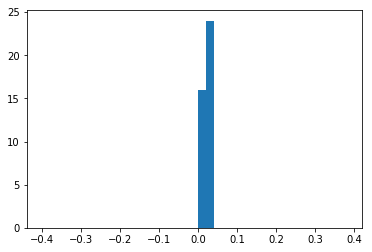

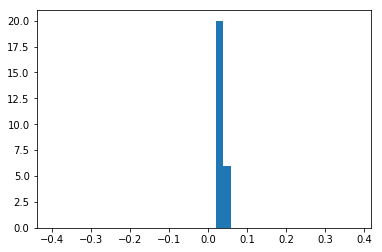

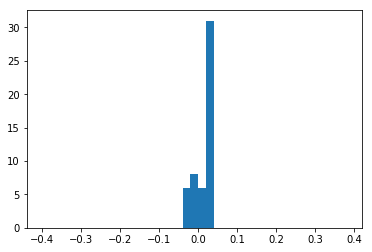

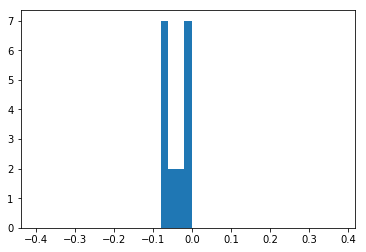

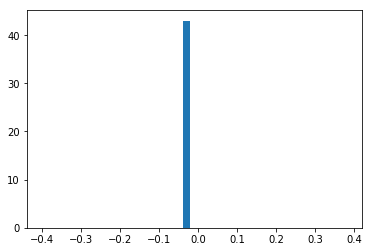

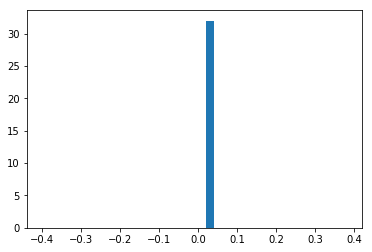

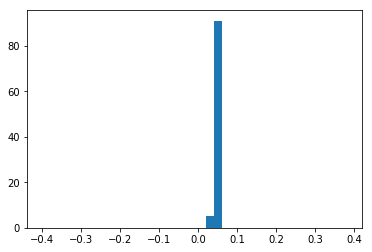

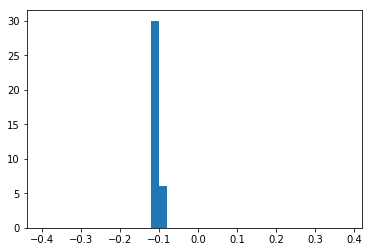

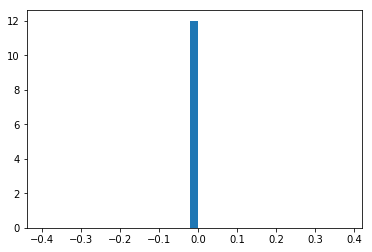

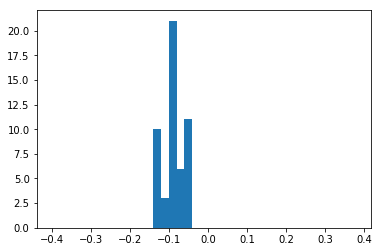

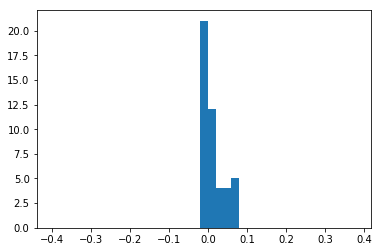

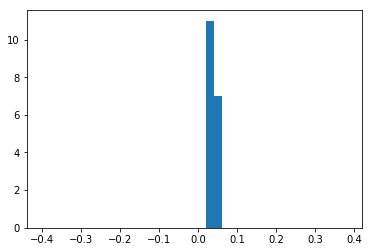

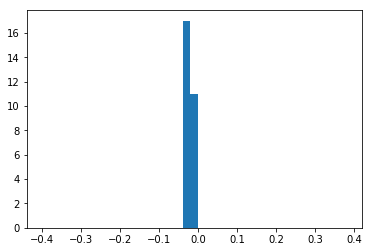

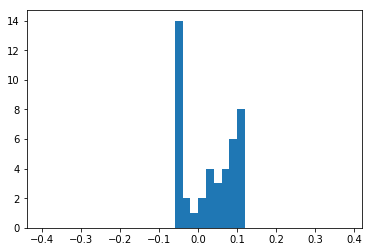

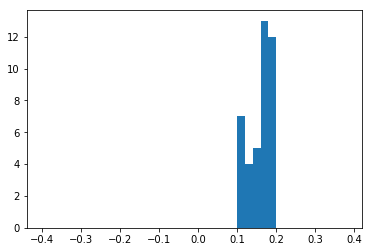

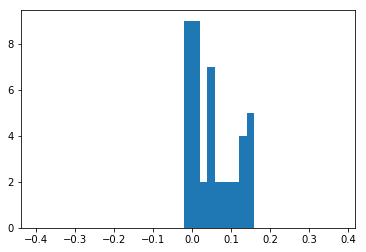

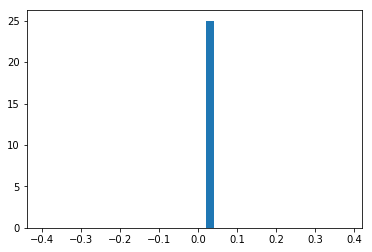

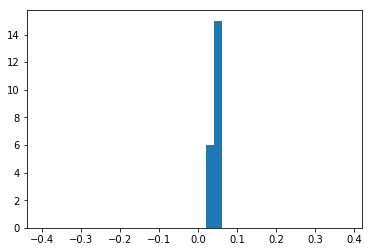

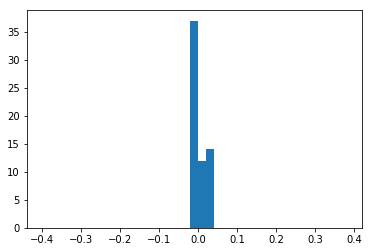

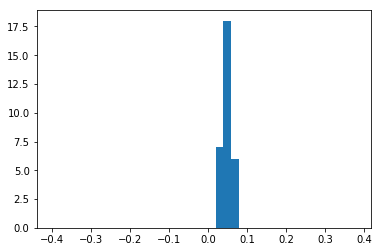

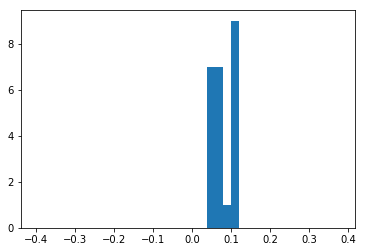

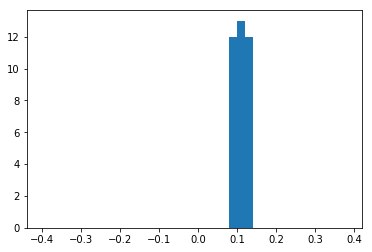

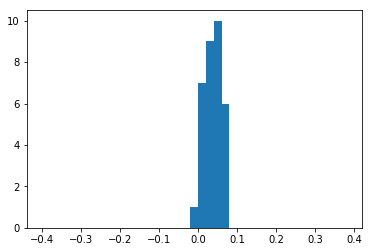

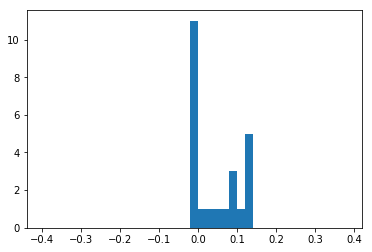

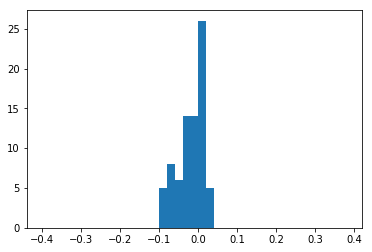

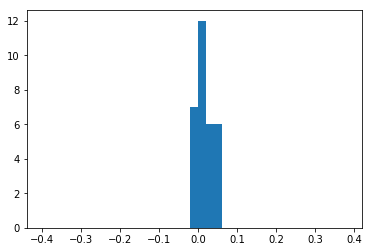

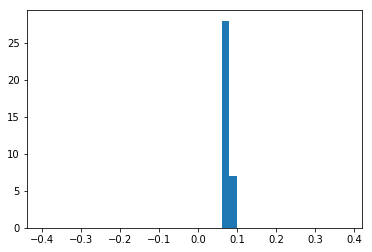

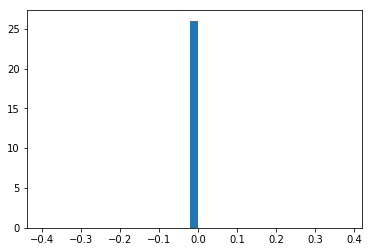

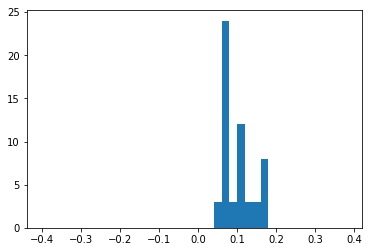

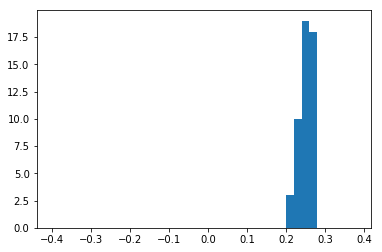

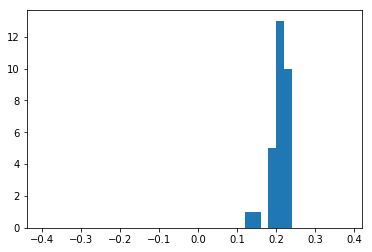

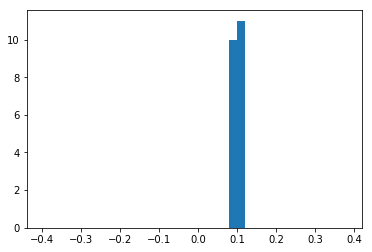

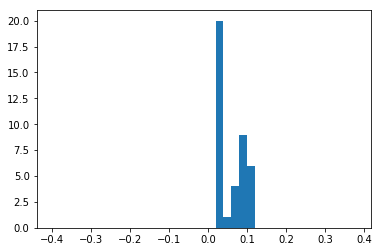

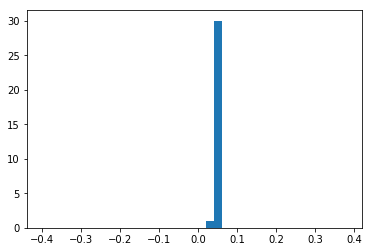

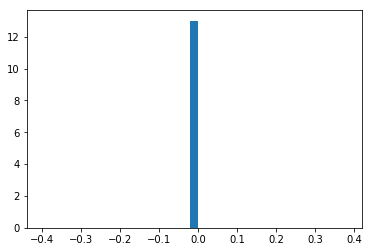

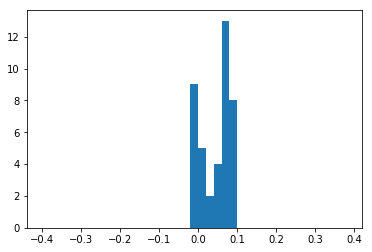

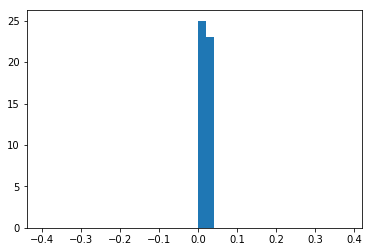

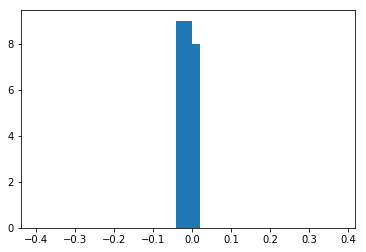

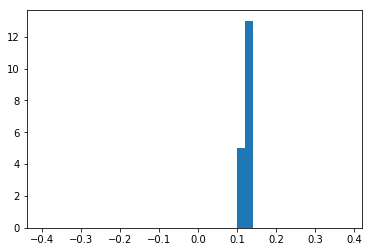

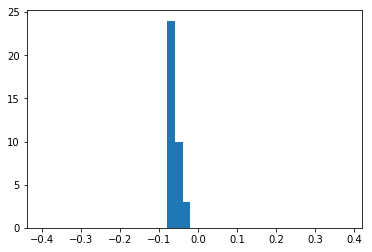

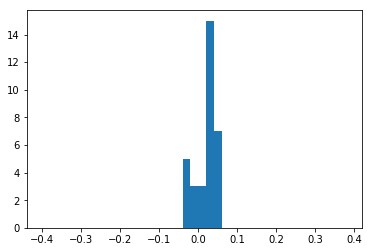

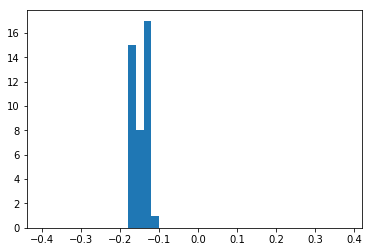

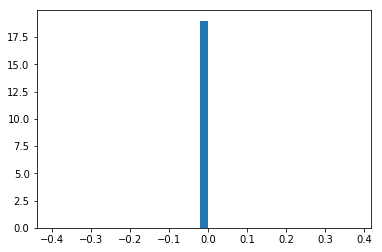

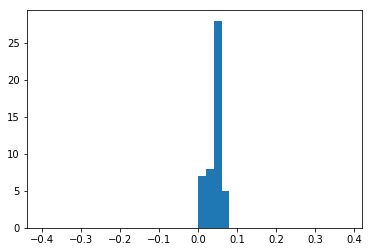

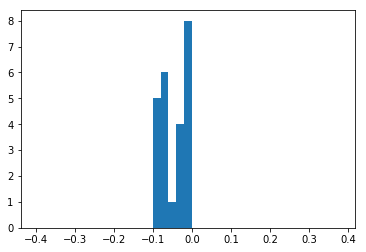

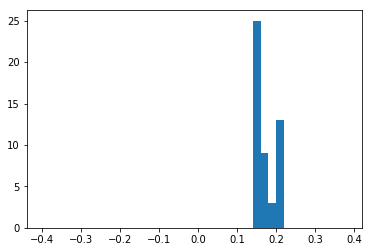

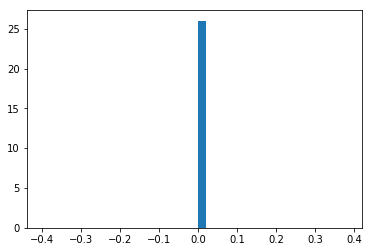

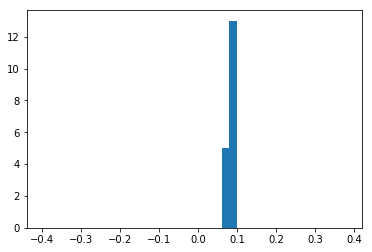

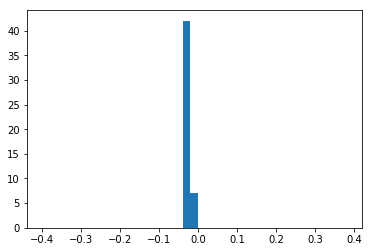

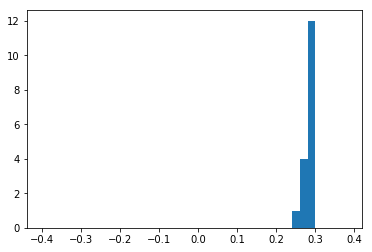

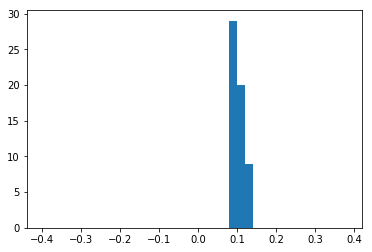

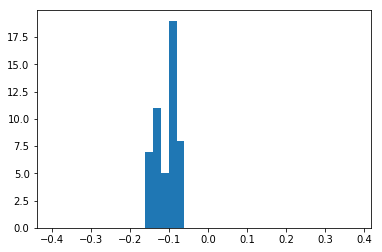

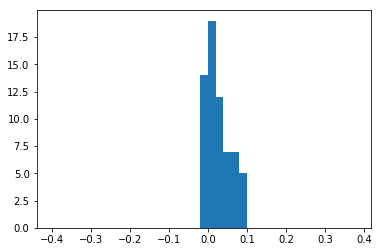

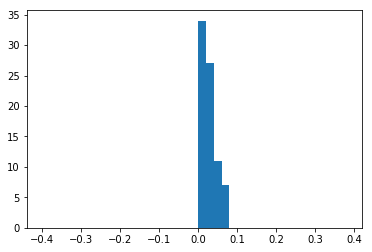

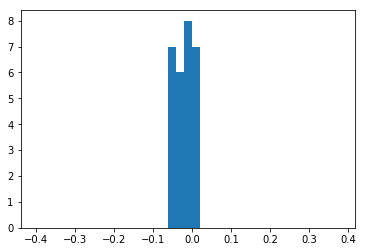

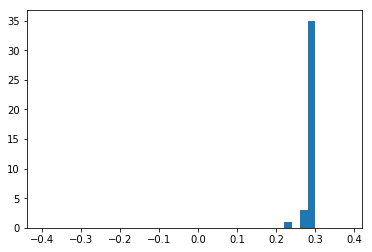

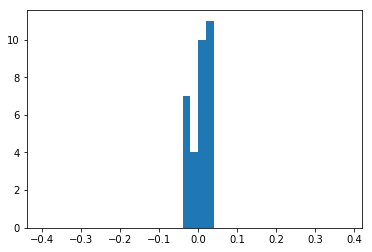

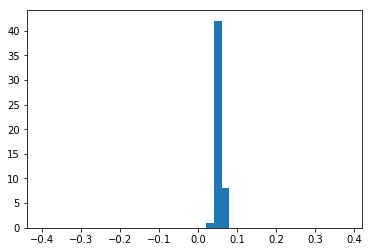

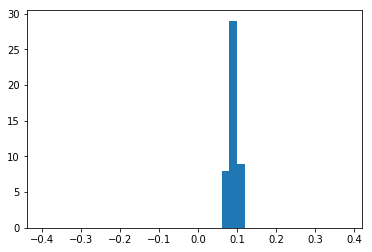

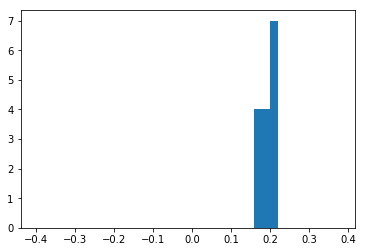

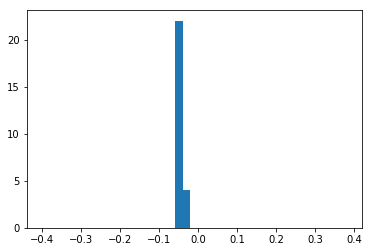

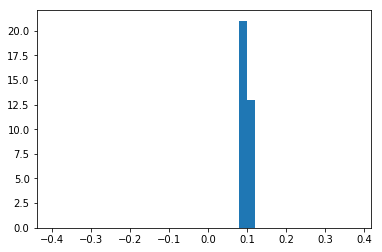

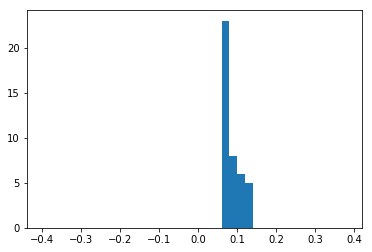

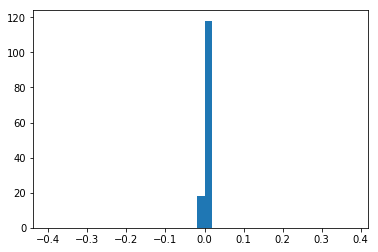

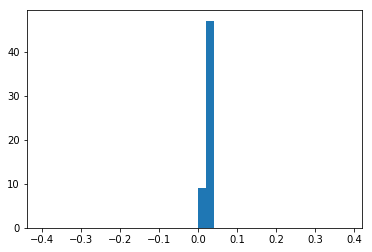

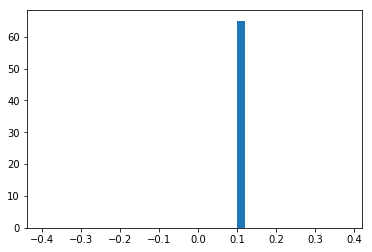

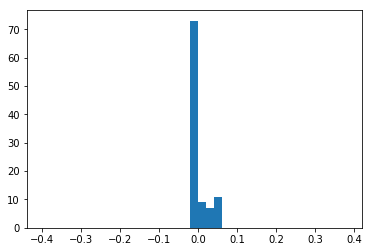

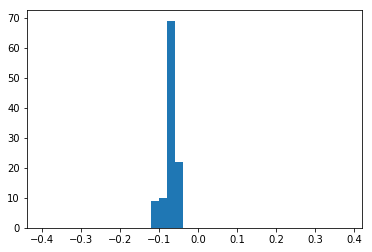

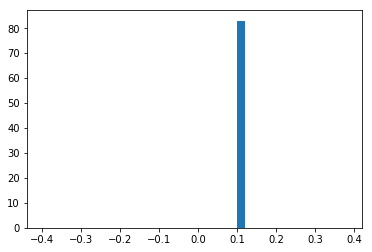

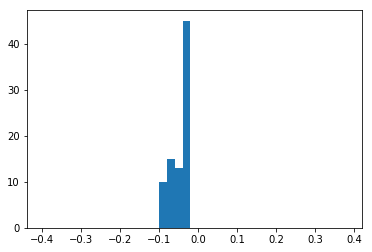

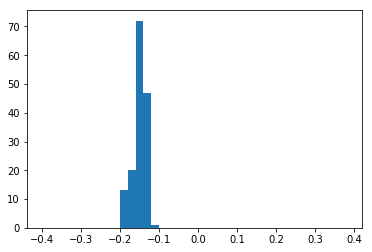

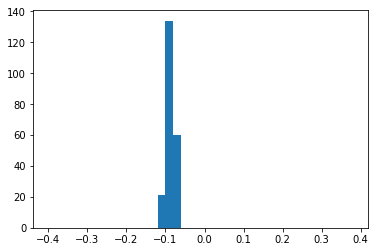

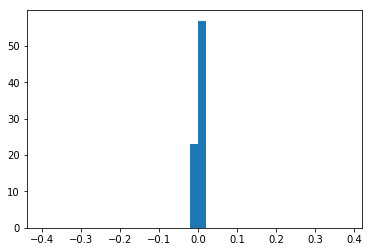

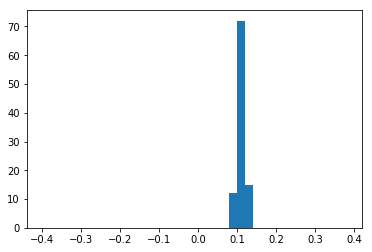

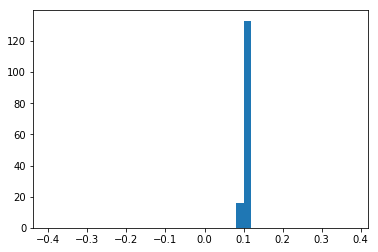

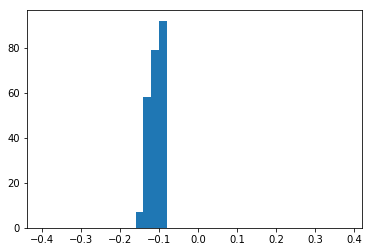

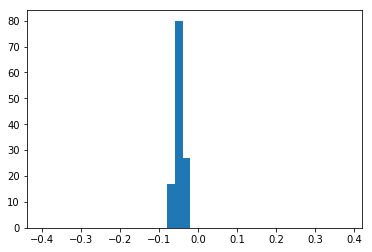

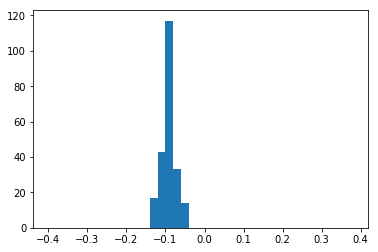

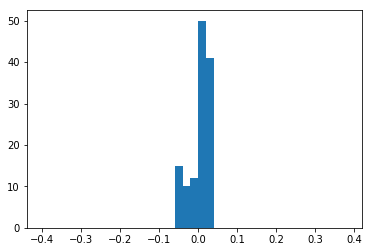

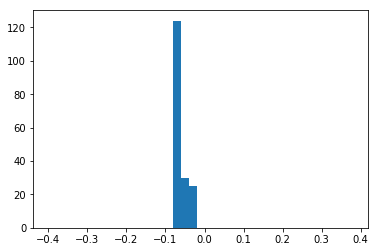

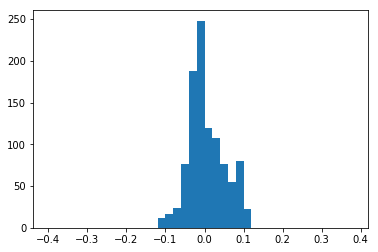

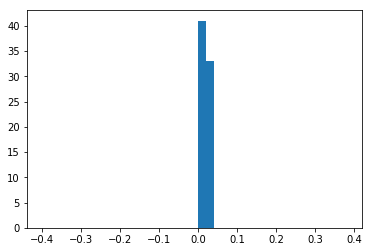

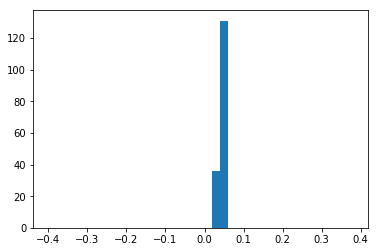

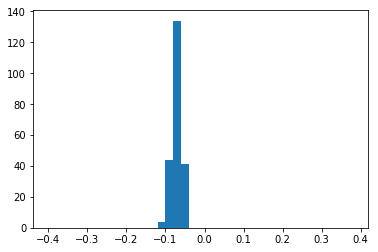

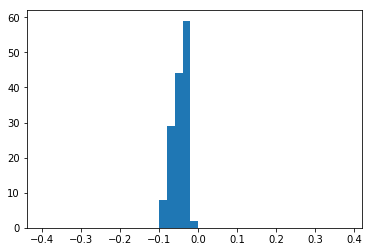

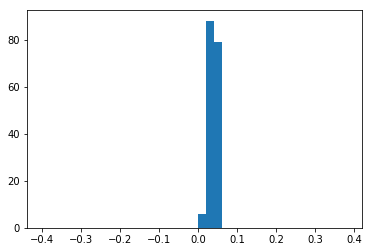

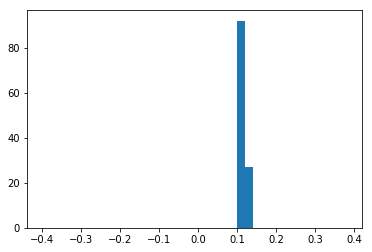

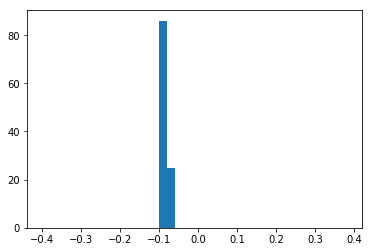

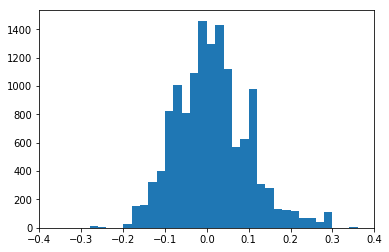

In [10]:

import os
import numpy as np
import glob
import pandas as pd
import scipy.signal
import matplotlib.pyplot as plt

# Beware of the leading space
# angle_type_prefix = ' pose_R'
ANGLE_TYPE_PREFIX = ' p_r'
# 7 or 9 is max and seems to be the best
FILTER_KERNEL = 9 
FRAME_RATE = 30

max_tilt = 0.4
step_tilt = 0.02
bins_range = np.arange(-max_tilt, max_tilt, 0.02)

tilts = []

angle_type = 'z'

FRAME_RATE = 30
all_widths = []
all_heights = []

for csv_file in glob.glob('./../data/*/*.csv'):
    df = pd.read_csv(csv_file)

    # Resample to common frame rate
    csv_frame_rate = (df.shape[0] - 1) / np.sum(np.diff(df[' timestamp']))
    if verbose:
        print(f'csv frame rate: {csv_frame_rate}')
    n_resampled_points = int(1 + (len(df[ANGLE_TYPE_PREFIX + angle_type]) - 1) * FRAME_RATE / csv_frame_rate)
    angles = scipy.signal.resample(df[ANGLE_TYPE_PREFIX + angle_type], num=n_resampled_points)
    
    # Apply median filter
    filt_angles = scipy.signal.medfilt(angles, kernel_size=FILTER_KERNEL)
    
    tilts.extend(filt_angles)
    
    plt.figure()
    plt.hist(filt_angles, bins=bins_range)
    plt.show()
    
plt.figure()
plt.hist(tilts, bins=bins_range)
plt.show()


# Extract peaks from tilt
Probably not much sense to use 1st derivative, probably better raw signal ...

In [1]:
import os
import numpy as np
from utils import get_peaks_params, get_perframe_features
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler


input_dir = './../data/*'

widths, heights = get_peaks_params(input_dir, angle_type='z', include_nan=False)
znorm_fit_data = np.column_stack((widths, heights))

znorm_scaler = StandardScaler()
znorm_scaler.fit(znorm_fit_data)

# Save z-norm parameters
np.savez('./tilt_znorm_params', mean=znorm_scaler.mean_, scale=znorm_scaler.scale_)

print(znorm_fit_data.shape)


(260, 2)


In [4]:
# Uses dcaps and nvb folders
input_dir = '/home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/*/segment'
output_filename_suffix = 'HEADTILT3'
znorm_params_file = '/home/ICT2000/jondras/ICMI-head-motion-detection/deploy/tilt_znorm_params.npz'

output_file_header = ['peak width', 'peak height', 'z-normalized peak width', 'z-normalized peak height']
# verbose = True
verbose = False

dcaps_cnt = 0
nvb_cnt = 0
# For each file
for csv_file in glob.glob(os.path.join(input_dir, '*/*/*_FACE.csv')):
    
    if 'dcaps' in csv_file:
        dcaps_cnt += 1
    elif 'nvb' in csv_file:
        nvb_cnt += 1
    
    print(f'Processing: {csv_file}')
    df = pd.read_csv(csv_file)
    features, angles = get_perframe_features(df, angle_type='z', verbose=verbose)
    
    # Get z-normalized features
#     znorm_params = np.load(znorm_params_file)
#     znormed_features = (features - znorm_params['mean']) / znorm_params['scale']
    znormed_features = znorm_scaler.transform(features)
    output_rows = np.column_stack((features, znormed_features))
    
    # Save features as a new csv file
    ann_df = pd.DataFrame(output_rows, columns=output_file_header)
    input_filepath = csv_file.split('/')
    output_filepath = os.path.join('/'.join(input_filepath[:-1]), input_filepath[-1][:-8] + output_filename_suffix + '.csv')
    ann_df.to_csv(output_filepath)
    print(f'\tSaved to: {output_filepath}')
        
print(f'\n\n\nProcessed {dcaps_cnt} dcaps files, {nvb_cnt} nvb files.')

Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_EventToErase/483_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_EventToErase/483_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_MostProudOf/483_MostProudOf_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_MostProudOf/483_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_LastTimeHappy/483_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_LastTimeHappy/483_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/483/483_HardestDecision/483_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-m

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/717/717_HowCloseToFamily/717_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/717/717_EventToErase/717_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/717/717_EventToErase/717_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/717/717_LastArgument/717_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/717/717_LastArgument/717_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/695/695_HardestDecision/695_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/695/695_HardestDecision/695_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/427/427_HowCloseToFamily/427_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_HardestDecision/697_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_HardestDecision/697_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_EventToErase/697_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_EventToErase/697_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_Guilty/697_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/697/697_Guilty/697_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_EventToErase/366_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_LastArgument/366_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_LastArgument/366_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_HowCloseToFamily/366_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_HowCloseToFamily/366_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_MostProudOf/366_MostProudOf_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/366/366_MostProudOf/366_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/364/364_LastArgument/364_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_EventToErase/454_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_EventToErase/454_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_HardestDecision/454_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_HardestDecision/454_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_LastTimeHappy/454_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/454/454_LastTimeHappy/454_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jond

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_HardestDecision/459_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_LastTimeHappy/459_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_LastTimeHappy/459_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_HowCloseToFamily/459_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_HowCloseToFamily/459_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_SituationHandledDifferent/459_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/459/459_SituationHandledDifferent/459_Situatio

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_LastTimeHappy/440_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_HardestDecision/440_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_HardestDecision/440_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_LastArgument/440_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_LastArgument/440_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_MostProudOf/440_MostProudOf_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/440/440_MostProudOf/440_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/688/688_HowCloseToFamily/688_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/688/688_Guilty/688_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/688/688_Guilty/688_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/420/420_Guilty/420_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/420/420_Guilty/420_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/420/420_LastTimeHappy/420_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/420/420_LastTimeHappy/420_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/seg

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/707/707_SituationHandledDifferent/707_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/707/707_MostProudOf/707_MostProudOf_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/707/707_MostProudOf/707_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/707/707_Guilty/707_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/707/707_Guilty/707_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/691/691_SituationHandledDifferent/691_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/691/691_SituationHandledDifferent/691_SituationHandledDifferent_HEADTILT3.

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_LastTimeHappy/699_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_HowCloseToFamily/699_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_HowCloseToFamily/699_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_HardestDecision/699_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_HardestDecision/699_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_SituationHandledDifferent/699_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/699/699_SituationHandledDifferent/699_Situ

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_SituationHandledDifferent/716_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_LastTimeHappy/716_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_LastTimeHappy/716_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_HardestDecision/716_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_HardestDecision/716_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_LastArgument/716_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/716/716_LastArgument/716_LastArgument_HEADTILT3.csv
Proc

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_SituationHandledDifferent/652_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_LastArgument/652_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_LastArgument/652_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_LastTimeHappy/652_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_LastTimeHappy/652_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_EventToErase/652_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/652/652_EventToErase/652_EventToErase_HEADTILT3.csv
Processing: /hom

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_EventToErase/664_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_LastTimeHappy/664_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_LastTimeHappy/664_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_HowCloseToFamily/664_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_HowCloseToFamily/664_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_LastArgument/664_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/664/664_LastArgument/664_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/490/490_MostProudOf/490_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/490/490_HowCloseToFamily/490_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/490/490_HowCloseToFamily/490_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/471/471_HowCloseToFamily/471_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/471/471_HowCloseToFamily/471_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/471/471_SituationHandledDifferent/471_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/471/471_SituationHandledDifferent/471_Situ

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/650/650_EventToErase/650_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/650/650_LastArgument/650_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/650/650_LastArgument/650_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/467/467_SituationHandledDifferent/467_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/467/467_SituationHandledDifferent/467_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/467/467_HowCloseToFamily/467_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/467/467_HowCloseToFamily/467_HowCloseT

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/654/654_EventToErase/654_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_LastArgument/481_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_LastArgument/481_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_HardestDecision/481_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_HardestDecision/481_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_MostProudOf/481_MostProudOf_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/481/481_MostProudOf/481_MostProudOf_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_EventToErase/712_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_Guilty/712_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_Guilty/712_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_HardestDecision/712_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_HardestDecision/712_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_SituationHandledDifferent/712_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/712/712_SituationHandledDifferent/712_SituationHandledDifferent_HEADTILT3.csv
Proces

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_Guilty/485_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_HowCloseToFamily/485_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_HowCloseToFamily/485_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_SituationHandledDifferent/485_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_SituationHandledDifferent/485_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_LastTimeHappy/485_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/485/485_LastTimeHappy/485_LastTimeHappy_

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/660/660_HowCloseToFamily/660_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/660/660_Guilty/660_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/660/660_Guilty/660_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/660/660_EventToErase/660_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/660/660_EventToErase/660_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/475/475_SituationHandledDifferent/475_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/475/475_SituationHandledDifferent/475_SituationHandledDifferent_HEADTILT3.csv
Processing

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_Guilty/468_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_LastArgument/468_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_LastArgument/468_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_HowCloseToFamily/468_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_HowCloseToFamily/468_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_HardestDecision/468_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/468/468_HardestDecision/468_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jond

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/703/703_SituationHandledDifferent/703_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/703/703_EventToErase/703_EventToErase_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/703/703_EventToErase/703_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/703/703_HowCloseToFamily/703_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/703/703_HowCloseToFamily/703_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/415/415_LastArgument/415_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/415/415_LastArgument/415_LastArgument_HEADTILT3.csv
Proc

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/443/443_HowCloseToFamily/443_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_SituationHandledDifferent/431_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_SituationHandledDifferent/431_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_Guilty/431_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_Guilty/431_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_LastArgument/431_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/431/431_LastArgument/431_LastArgument_HEADTILT3.csv
Processing

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_EventToErase/492_EventToErase_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_HowCloseToFamily/492_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_HowCloseToFamily/492_HowCloseToFamily_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_HardestDecision/492_HardestDecision_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_HardestDecision/492_HardestDecision_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_LastArgument/492_LastArgument_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/492/492_LastArgument/492_LastArgument_HEADTILT3.csv
Processing: /home/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_LastArgument/472_LastArgument_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_LastTimeHappy/472_LastTimeHappy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_LastTimeHappy/472_LastTimeHappy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_SituationHandledDifferent/472_SituationHandledDifferent_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_SituationHandledDifferent/472_SituationHandledDifferent_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_HowCloseToFamily/472_HowCloseToFamily_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/dcaps/segment/472/472_HowCloseToFamily/472_HowCl

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN51M0/AGN51M0_Disappointment/AGN51M0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN51M0/AGN51M0_Guilty/AGN51M0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN51M0/AGN51M0_Guilty/AGN51M0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN51M0/AGN51M0_Proud/AGN51M0_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN51M0/AGN51M0_Proud/AGN51M0_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW19F1/RAW19F1_Old/RAW19F1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW19F1/RAW19F1_Old/RAW19F1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW23M1/RAW23M1_Fantasy/RAW23M1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW23M1/RAW23M1_Hate/RAW23M1_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW23M1/RAW23M1_Hate/RAW23M1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN48F1/AGN48F1_Proud/AGN48F1_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN48F1/AGN48F1_Proud/AGN48F1_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN48F1/AGN48F1_Disappointment/AGN48F1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN48F1/AGN48F1_Disappointment/AGN48F1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Hometown/EDG30F0_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Hate/EDG30F0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Hate/EDG30F0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Time/EDG30F0_Time_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Time/EDG30F0_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Fantasy/EDG30F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG30F0/EDG30F0_Fantasy/EDG30F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Fantasy/AGN39M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Hurt/AGN39M0_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Hurt/AGN39M0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Hate/AGN39M0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Hate/AGN39M0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Guilty/AGN39M0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN39M0/AGN39M0_Guilty/AGN39M0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/n

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Old/RAW28F0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Disappointment/RAW28F0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Disappointment/RAW28F0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Guilty/RAW28F0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Guilty/RAW28F0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Fantasy/RAW28F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW28F0/RAW28F0_Fantasy/RAW28F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jond

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Dislike/AGN38M0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Hate/AGN38M0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Hate/AGN38M0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Proud/AGN38M0_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Proud/AGN38M0_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Old/AGN38M0_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN38M0/AGN38M0_Old/AGN38M0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segme

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG21M0/EDG21M0_Fantasy/EDG21M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG21M0/EDG21M0_Disappointment/EDG21M0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG21M0/EDG21M0_Disappointment/EDG21M0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG21M0/EDG21M0_Dislike/EDG21M0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG21M0/EDG21M0_Dislike/EDG21M0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW18M1/RAW18M1_Dislike/RAW18M1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW18M1/RAW18M1_Dislike/RAW18M1_Dislike_HEADTILT3.csv
Processing: /home/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW08F1/RAW08F1_Dislike/RAW08F1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW08F1/RAW08F1_Fantasy/RAW08F1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW08F1/RAW08F1_Fantasy/RAW08F1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG10M0/EDG10M0_Hate/EDG10M0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG10M0/EDG10M0_Hate/EDG10M0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG10M0/EDG10M0_Fantasy/EDG10M0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG10M0/EDG10M0_Fantasy/EDG10M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detecti

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Disappointment/AGN37F0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Guilty/AGN37F0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Guilty/AGN37F0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Dislike/AGN37F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Dislike/AGN37F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Fantasy/AGN37F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN37F0/AGN37F0_Fantasy/AGN37F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Hate/AGN29M1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Fantasy/AGN29M1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Fantasy/AGN29M1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Disappointment/AGN29M1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Disappointment/AGN29M1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Hurt/AGN29M1_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN29M1/AGN29M1_Hurt/AGN29M1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Time/EDG36M1_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Dislike/EDG36M1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Dislike/EDG36M1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Old/EDG36M1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Old/EDG36M1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Disappointment/EDG36M1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG36M1/EDG36M1_Disappointment/EDG36M1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-h

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Time/RAW27F1_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Hate/RAW27F1_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Hate/RAW27F1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Disappointment/RAW27F1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Disappointment/RAW27F1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Guilty/RAW27F1_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW27F1/RAW27F1_Guilty/RAW27F1_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-h

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW40M0/RAW40M0_Fantasy/RAW40M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW40M0/RAW40M0_Hometown/RAW40M0_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW40M0/RAW40M0_Hometown/RAW40M0_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW40M0/RAW40M0_Old/RAW40M0_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW40M0/RAW40M0_Old/RAW40M0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN53M0/AGN53M0_Dislike/AGN53M0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN53M0/AGN53M0_Dislike/AGN53M0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detecti

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG06F0/EDG06F0_Hurt/EDG06F0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG06F0/EDG06F0_Fantasy/EDG06F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG06F0/EDG06F0_Fantasy/EDG06F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN36F1/AGN36F1_Hometown/AGN36F1_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN36F1/AGN36F1_Hometown/AGN36F1_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN36F1/AGN36F1_Old/AGN36F1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN36F1/AGN36F1_Old/AGN36F1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kal

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW31M0/RAW31M0_Hate/RAW31M0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Guilty/RAW35M0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Guilty/RAW35M0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Dislike/RAW35M0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Dislike/RAW35M0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Hometown/RAW35M0_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW35M0/RAW35M0_Hometown/RAW35M0_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-d

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Time/RAW37F0_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Fantasy/RAW37F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Fantasy/RAW37F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Hurt/RAW37F0_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Hurt/RAW37F0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Disappointment/RAW37F0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW37F0/RAW37F0_Disappointment/RAW37F0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Disappointment/EDG24F1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Proud/EDG24F1_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Proud/EDG24F1_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Fantasy/EDG24F1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Fantasy/EDG24F1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Time/EDG24F1_Time_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG24F1/EDG24F1_Time/EDG24F1_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-d

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Guilty/AGN44M1_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Fantasy/AGN44M1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Fantasy/AGN44M1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Old/AGN44M1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Old/AGN44M1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Disappointment/AGN44M1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN44M1/AGN44M1_Disappointment/AGN44M1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN47F0/AGN47F0_Hurt/AGN47F0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN47F0/AGN47F0_Proud/AGN47F0_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN47F0/AGN47F0_Proud/AGN47F0_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW20F0/RAW20F0_Hurt/RAW20F0_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW20F0/RAW20F0_Hurt/RAW20F0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW20F0/RAW20F0_Dislike/RAW20F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW20F0/RAW20F0_Dislike/RAW20F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW11M1/RAW11M1_Hurt/RAW11M1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Hate/AGN32F0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Hate/AGN32F0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Dislike/AGN32F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Dislike/AGN32F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Guilty/AGN32F0_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN32F0/AGN32F0_Guilty/AGN32F0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Dislike/EDG03F1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Old/EDG03F1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Old/EDG03F1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Guilty/EDG03F1_Guilty_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Guilty/EDG03F1_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Hometown/EDG03F1_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG03F1/EDG03F1_Hometown/EDG03F1_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/k

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Hurt/AGN34M1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Dislike/AGN34M1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Dislike/AGN34M1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Disappointment/AGN34M1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Disappointment/AGN34M1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Hate/AGN34M1_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN34M1/AGN34M1_Hate/AGN34M1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Guilty/RAW10F0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Proud/RAW10F0_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Proud/RAW10F0_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Disappointment/RAW10F0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Disappointment/RAW10F0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Dislike/RAW10F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW10F0/RAW10F0_Dislike/RAW10F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jo

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Disappointment/RAW03F0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Fantasy/RAW03F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Fantasy/RAW03F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Hurt/RAW03F0_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Hurt/RAW03F0_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Dislike/RAW03F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW03F0/RAW03F0_Dislike/RAW03F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Guilty/RAW32F0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Dislike/RAW32F0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Dislike/RAW32F0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Hate/RAW32F0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Hate/RAW32F0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Fantasy/RAW32F0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW32F0/RAW32F0_Fantasy/RAW32F0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW42F1/RAW42F1_Time/RAW42F1_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW42F1/RAW42F1_Dislike/RAW42F1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW42F1/RAW42F1_Dislike/RAW42F1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW42F1/RAW42F1_Proud/RAW42F1_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW42F1/RAW42F1_Proud/RAW42F1_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG31F1/EDG31F1_Hurt/EDG31F1_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG31F1/EDG31F1_Hurt/EDG31F1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Old/AGN46M0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Hometown/AGN46M0_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Hometown/AGN46M0_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Disappointment/AGN46M0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Disappointment/AGN46M0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Hate/AGN46M0_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN46M0/AGN46M0_Hate/AGN46M0_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Hate/EDG08M1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Time/EDG08M1_Time_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Time/EDG08M1_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Dislike/EDG08M1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Dislike/EDG08M1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Fantasy/EDG08M1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG08M1/EDG08M1_Fantasy/EDG08M1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kal

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Fantasy/RAW39F1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hurt/RAW39F1_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hurt/RAW39F1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hometown/RAW39F1_Hometown_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hometown/RAW39F1_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hate/RAW39F1_Hate_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/RAW39F1/RAW39F1_Hate/RAW39F1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalin

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Proud/AGN26M1_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Hurt/AGN26M1_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Hurt/AGN26M1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Fantasy/AGN26M1_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Fantasy/AGN26M1_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Dislike/AGN26M1_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN26M1/AGN26M1_Dislike/AGN26M1_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/k

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN42F1/AGN42F1_Hate/AGN42F1_Hate_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN42F1/AGN42F1_Hurt/AGN42F1_Hurt_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN42F1/AGN42F1_Hurt/AGN42F1_Hurt_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN42F1/AGN42F1_Disappointment/AGN42F1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN42F1/AGN42F1_Disappointment/AGN42F1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN28M0/AGN28M0_Fantasy/AGN28M0_Fantasy_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN28M0/AGN28M0_Fantasy/AGN28M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/IC

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG19F1/EDG19F1_Hometown/EDG19F1_Hometown_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Disappointment/AGN21F1_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Disappointment/AGN21F1_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Proud/AGN21F1_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Proud/AGN21F1_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Old/AGN21F1_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/AGN21F1/AGN21F1_Old/AGN21F1_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-h

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Guilty/EDG35M0_Guilty_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Disappointment/EDG35M0_Disappointment_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Disappointment/EDG35M0_Disappointment_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Old/EDG35M0_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Old/EDG35M0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Proud/EDG35M0_Proud_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG35M0/EDG35M0_Proud/EDG35M0_Proud_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-

	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Fantasy/EDG05M0_Fantasy_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Old/EDG05M0_Old_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Old/EDG05M0_Old_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Dislike/EDG05M0_Dislike_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Dislike/EDG05M0_Dislike_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Time/EDG05M0_Time_FACE.csv
	Saved to: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/nvb/segment/EDG05M0/EDG05M0_Time/EDG05M0_Time_HEADTILT3.csv
Processing: /home/ICT2000/jondras/ICMI-head-motion-detection/kalins_data/n